# Exploración de indicadores que reflejen la incidencia de Covid-19 en Venezuela usando fuentes de datos no oficiales.

# Análisis de datos extraídos de Twitter

Este notebook de Jupyter contiene todo el código utilizado para el análisis y la construcción de las series de tiempo de los datos extraídos de Twitter.
___ 

## Configuración

Configurar el entorno importando las bibliotecas con las que se trabajaran. `pandas`, una biblioteca de ciencia de datos; `matplotlib` y `seaborn` bibliotecas para la visualización de los datos. 


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Definir el estilo de las gráficas utilizando `seaborn`.

In [3]:
#tamaño
sns.set(rc={'figure.figsize':(11, 5)})
 #fondo
sns.set_style("white") # 

## Clasificación de los datos

Las consultas fueron las siguientes: "covid-19", "coronavirus", "infectado covid-19", "muerte covid-19", "bombona de oxígeno", "flujómetro de oxígeno", "saturación de oxígeno", "dexametasona", "GoFundMe venezuela", "covid-19", "recolectar dinero covid-19", "ayuda covid-19", "tratamiento covid-19", "UCI", y "unidad de cuidados intensivos". Puede ver el notebook de extracción de datos [aquí](https://github.com/bonaldee/Proyecto_OP2/blob/main/codigo/Twitter_Datos.ipynb)

Sin embargo, "covid-19" y "coronavirus" se descartan debido a que estos tweets están relacionado a cualquier noticia o comentarios sobre el  COVID_19 desde el inicio de la pandemia, no necesariamente sobre infectados. El resto de consultas las dividimos en 6 grupos, a saber: 

1. Grupo 1 
   - infectado covid-19
   - muerte covid-19
2. Grupo 2 
   - bombona de oxígeno
   - flujometro de oxígeno
   - saturación de oxígeno
   - dexametasona
3. Grupo 3
   - GoFundMe venezuela covid-19
   - recolectar dinero covid-19
   - ayuda covid-19
4. Grupo 4
   - servicio público
5. Grupo 5
   - UCI
   - unidad de cuidados intensivos.
6. Grupo 6
   - tratamiento covid-19

___

### Presentación de los datos totales

Primero se muestra la relación de los tweets totales extraídos desde marzo 2020 hasta mayo 2021, los cuales fueron 2666, luego se hace la presentación individual por grupo. 

En principio, se cargan los datos que se encuentran de un archivo .CSV.; luego se pide su forma para estar al tanto de cuantos tweets se recaudaron en total; finalmente se eliminan las filas que sean iguales ya que representan tweets repetidos.

In [4]:
df = pd.read_csv('../datos/datos_twitter/data.csv', parse_dates=['created_at'])
print(df.shape)
df.drop_duplicates(keep='first')

(2666, 2)


,created_at,text
0,2021-04-28T23:17:21+00:00,Venezuela: el país donde el fiscal general qui...
1,2021-04-26T05:21:31+00:00,"@the_efosa Hi, I'm a desperate son loocking fo..."
2,2021-04-19T05:30:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
3,2021-04-19T02:08:17+00:00,"Aún falta mucho, todavía los familiares de Ani..."
4,2021-04-18T22:00:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
...,...,...
2661,2020-09-07T21:41:29+00:00,"Venezuela muere, un caso de hoy, masculino 54 ..."
2662,2020-09-05T01:56:30+00:00,Gente de Twitter el oximetro es un aparato uti...
2663,2020-08-27T19:11:26+00:00,¿Para que sirve el oxímetro de pulso?.\n.\nPri...
2664,2020-08-24T12:21:49+00:00,@Elpapudemc Deben monitorear la saturación de ...


De los 2666 tweets recaudados en total, luego de eliminar las columnas repetidas, queda un total de 2485. 

A continuación, se crea una función que hace la conversión de la columna "created_ad" a un formato específico para ser utilizado en las series de tiempo, luego agrupa las entradas de cada día y la convierte en una serie de tiempo.

In [5]:
def counts_time_series(df):
    """Convertir la columna 'created_at' a fecha"""
    df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d', errors='coerce')
    
    """Agrupa por el día y cuenta el numero de entradas con ese día"""
    time_series_with_counts = df.groupby(df['created_at'].dt.floor('d')).size()
    
    return time_series_with_counts

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

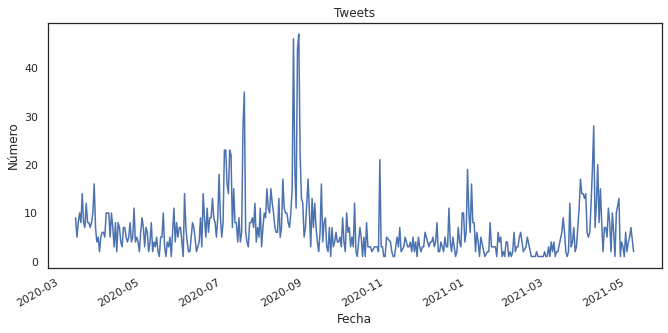

In [6]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

La Figura nos muestra la serie de tiempo del número total de tweets que coinciden con las consultas seleccionadas; se observa un comportamiento irregular en ella, pero se puede notar que existe un notable incremento en septiembre de 2020 y abril de 2021. 

<<<Falta completar este análisis<<< 

### Grupo 1: infectado covid-19, muerte covid-19

In [7]:
df = pd.read_csv('../datos/datos_twitter/twitter_1_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
print(df.shape)
df.drop_duplicates(keep='first')

(365, 2)


,created_at,text
0,2021-04-28 11:18:54+00:00,Sumado al dolor por la muerte de Aristóbulo Is...
1,2021-04-27 13:53:51+00:00,Muy triste por la muerte del profesor Andrés S...
2,2021-04-24 17:18:23+00:00,@eloscarale *disminuye las probabilidades de c...
3,2021-04-24 14:23:13+00:00,"Éste capítulo se llama ""Danzando alrededor de ..."
4,2021-04-20 00:15:53+00:00,"Lamento la muerte del Alcalde Bastidas, como ..."
...,...,...
360,2020-03-20 19:27:51+00:00,una tos leve y no se sienta enfermo. La OMS es...
361,2020-03-19 18:00:45+00:00,Lavarte las manos puede protegerte del #Covid_...
362,2020-03-16 22:10:40+00:00,Ante la pandemia del COVID-19 tocó tapabocas p...
363,2020-03-16 21:15:04+00:00,Procure que una persona sana cuide de su masco...


En total se extraen 365 tweets, luego de remover los tweets duplicados, queda un total de 360, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

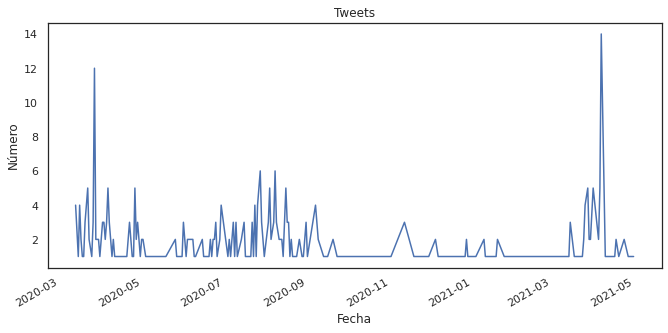

In [8]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 1: bombona de oxígeno, flujometro de oxígeno, saturación de oxígeno, dexametasona

In [9]:
df = pd.read_csv('../datos/datos_twitter/twitter_2_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
print(df.shape)
df.drop_duplicates(keep='first')

(295, 2)


,created_at,text
0,2021-04-28 17:26:59+00:00,🚑 El hijo de una amiga sufrió la picadura de u...
1,2021-04-24 13:36:31+00:00,Buenos días quien tenga información exacta y n...
2,2021-04-24 13:34:00+00:00,@VirguezFranklin Reflexione!! Quienes son los...
3,2021-04-24 13:25:07+00:00,Reflexione!! Quienes son los reales genocidas...
4,2021-04-22 14:07:09+00:00,Muchos pagan lo que no tienen por una bombona ...
...,...,...
290,2020-09-07 21:41:29+00:00,"Venezuela muere, un caso de hoy, masculino 54 ..."
291,2020-09-05 01:56:30+00:00,Gente de Twitter el oximetro es un aparato uti...
292,2020-08-27 19:11:26+00:00,¿Para que sirve el oxímetro de pulso?.\n.\nPri...
293,2020-08-24 12:21:49+00:00,@Elpapudemc Deben monitorear la saturación de ...


En total se extraen 295 tweets, luego de remover los tweets duplicados, queda un total de 247, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

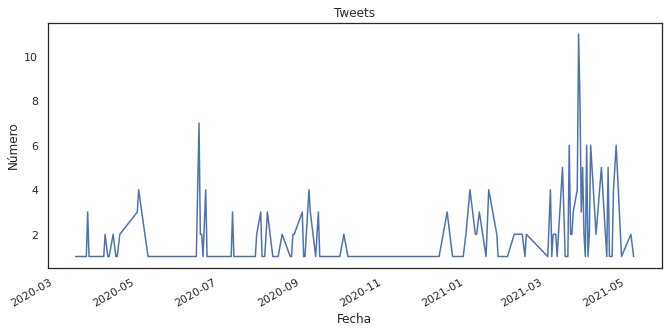

In [10]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 3: GoFundMe venezuela covid-19, recolectar dinero covid-19, ayuda covid-19

In [11]:
df = pd.read_csv('../datos/datos_twitter/twitter_3_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
print(df.shape)
df.drop_duplicates(keep='first')

(674, 2)


,created_at,text
0,2021-04-13 22:54:38+00:00,Qué horrible que en Venezuela todo está colaps...
1,2021-04-12 19:53:10+00:00,Desde el #1Abr se han abierto 210 campañas de ...
2,2021-04-09 14:42:17+00:00,Venezuela recurre a GoFoundMe para luchar cont...
3,2021-04-06 07:08:20+00:00,My Twitter/Facebook feeds are full of GoFoundM...
4,2021-04-05 17:46:05+00:00,@Simonovis Con Razón eso explicaría que 👉 El T...
...,...,...
667,2021-01-19 18:00:48+00:00,#ServicioPublico #ServicioSocial #Gofundme #Co...
668,2021-01-17 18:05:41+00:00,Sabías que los venezolanos acuden a la creació...
671,2021-04-07 15:31:17+00:00,Buenos días se necesita con urgencia estos med...
672,2021-01-07 14:31:39+00:00,FundaRedes propone crear Comité especial para ...


En total se extraen 674 tweets, luego de remover los tweets duplicados, queda un total de 6665, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

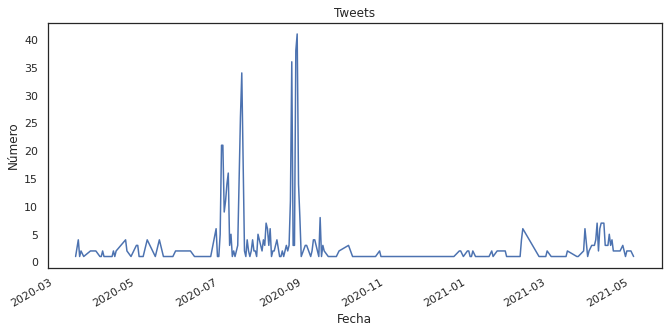

In [12]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 4: servicio público

In [13]:
df = pd.read_csv('../datos/datos_twitter/twitter_4_grupo.csv', parse_dates=['created_at']) 
print(df.shape)
df.drop_duplicates(keep='first')

(951, 2)


,created_at,text
0,2020-07-27 01:15:10+00:00,#ServicioPúblico #Táchira. Se necesita con urg...
1,2020-07-26 17:03:31+00:00,¡Dios Santo!!! Esta es la situación real en #V...
2,2020-07-26 12:37:41+00:00,#ServicioPúblico https://t.co/sW2kSphw8K
3,2020-07-25 22:36:23+00:00,#ServicioPublico\nSi está en tus posibilidades...
4,2020-07-25 19:59:04+00:00,#ServicioPúblico https://t.co/OS8F7Aa9He
...,...,...
922,2021-04-19 18:47:37+00:00,URGENTE Servicio público *APOYEMOS A ALDA FRAN...
923,2021-04-10 01:33:41+00:00,Servicio Público\n\nPilar Guerra es coordinado...
924,2021-04-10 01:23:08+00:00,SERVICIO PÚBLICO | Para la Sra. Carmen Gisela ...
925,2021-03-08 01:39:05+00:00,"El ministro de Transporte , Hipólito Abreu, an..."


En total se extraen 951 tweets, luego de remover los tweets duplicados, queda un total de 896, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

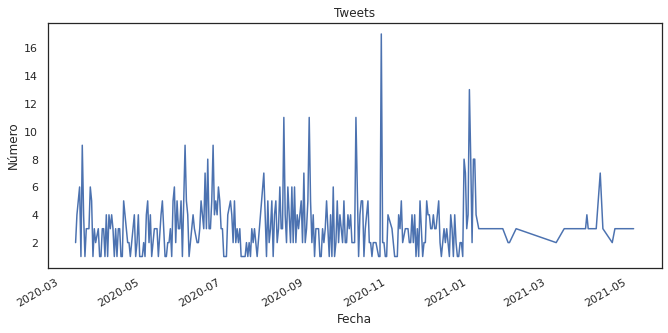

In [14]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 5: UCIS, unidad de cuidados intensivos

In [15]:
df = pd.read_csv('../datos/datos_twitter/twitter_5_grupo.csv', parse_dates=['created_at'])  
print(df.shape) 
df.drop_duplicates(keep='first')

(76, 2)


,created_at,text
0,2021-04-26 12:52:42+00:00,UCI DE PRIMER MUNDO✅👏🏻\n\n@EdwinRojasM: En la ...
1,2021-04-26 12:51:07+00:00,En Vivo 📻 programa La Voz De Sucre 📺\n@EdwinRo...
2,2021-04-23 13:31:15+00:00,Cumpliendo con las orientaciones precisas del ...
3,2021-04-19 13:40:36+00:00,#SALUD | Próximamente se estará inaugurando la...
4,2021-04-19 13:30:46+00:00,El líder sucrense @EdwinRojasM anunció que pr...
...,...,...
71,2021-05-03 14:59:27+00:00,Con una inversión de 180mil millones de Bs\nSe...
72,2021-05-03 14:13:10+00:00,El Gobernador @EdwinRojasM indicó que la unida...
73,2021-05-03 12:11:49+00:00,Gobernador @EdwinRojasM Siempre pensando en su...
74,2021-05-01 16:35:13+00:00,Hermana. El murió primero. En Valencia. Ella m...


En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

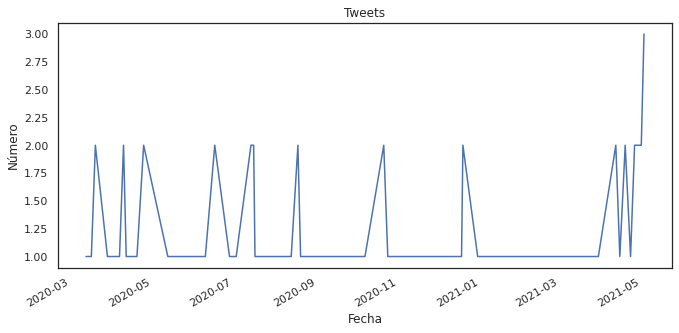

In [16]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 6: tratamiento covid-19 

In [17]:
df = pd.read_csv('../datos/datos_twitter/twitter_6_grupo.csv', parse_dates=['created_at']) 
print(df.shape)
df.drop_duplicates(keep='first')

(324, 2)


,created_at,text
0,2021-04-29 13:12:42+00:00,Atender a los pacientes con Covid-19 es una tr...
1,2021-04-28 21:17:54+00:00,#28Abr El padre Beltrán Sánchez superó el #Cov...
2,2021-04-26 21:55:49+00:00,#26Abr Al final de la noche del domingo #25Abr...
3,2021-04-26 13:50:57+00:00,Se entegaron 6 nuevos equipos de ventilación m...
4,2021-04-26 10:08:44+00:00,TRATAMIENTO PARA COVID-19 YA VACUNAS YA
...,...,...
319,2020-03-15 20:00:44+00:00,No se deben usar antibióticos como medio de pr...
320,2020-03-14 03:26:41+00:00,#coronapocalypse #coronavirusvenezuela #Covid_...
321,2020-03-13 19:36:45+00:00,"La Cuba ""Castro-Comunista"" a la vanguardia mu..."
322,2020-03-13 02:37:57+00:00,@joselui02124198 Así como han ocultado estadís...


En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:title={'center':'Tweets'}, xlabel='Fecha', ylabel='Número'>

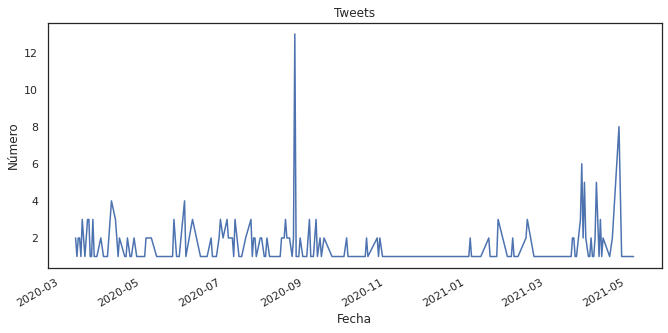

In [18]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")